![raptorQube](./images/raptorqube.jpg)

# Andreas Francois Vermeulen

![Vermeulen](./images/vermeulen.png)

### Supervisors: Dr Juliana Kuster Filipe Bowles / Dr Vladimir Janjic - University of St Andrews

![St Andrews](./images/standrews.jpg)

![raptorQube](./images/raptorqube2.jpg)

# Crawler-Chromosome Builder

![Crawler](./images/BasicCrawlerSmall.png)

## DNA Builder

In [1]:
import itertools as it
import numpy as np
import sqlite3 as sq
from sqlite3 import Error
import os
import pandas as pd
%matplotlib inline  

In [2]:
countries=np.array(
    [
            'Austria',
            'Belgium',
            'Bulgaria',
            'Croatia',
            'Cyprus',
            'Czech Republic',
            'Denmark',
            'Estonia',
            'Finland',
            'France',
            'Germany',
            'Greece',
            'Hungary',
            'Ireland',
            'Italy',
            'Latvia',
            'Lithuania',
            'Luxembourg',
            'Malta',
            'Netherlands',
            'Poland',
            'Portugal',
            'Romania',
            'Slovakia',
            'Slovenia',
            'Spain',
            'Sweden',
            'United Kingdom'
    ]
)

In [3]:
countries.shape

(28,)

![Data Lake](./images/DataLake.JPG)

In [4]:
tpole=['Time','Person','Organisation','Location','Event']

In [5]:
DLDirName = './100-DL/100-Raw-Zone/0100-External'

In [6]:
if not os.path.exists(DLDirName):
    print('Creating new Data Lake directory')
    print(DLDirName)
    os.makedirs(DLDirName)
else:
    print('Using Data Lake directory')
    print(DLDirName)

Using Data Lake directory
./100-DL/100-Raw-Zone/0100-External


In [7]:
newstart=False
crawlerFormat = [countries.shape[0], 1, 1]

rifDirName=os.path.abspath('./000-RIF')

![Crawler](./images/crawler.png)

## Extinct Crawlers

In [8]:
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions')

for root, dirs, files in os.walk(opsDirName, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        filename, file_extension = os.path.splitext(name)
        if file_extension == '.py':
            os.remove(os.path.join(root, name))

C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\100-Crawler-Master-Service-Definitions\Crawler-Master-Service-Definitions.db
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000001.py
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000002.py
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000003.py
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000004.py
C:\Users\sirve\Documents\GitRaptor

### Crawler Build

In [9]:
i=list(range(1,crawlerFormat[0]+1,1))
inputChromosomeList = ['IC-%06d' % x for x in i]

In [10]:
p=list(range(1,crawlerFormat[1]+1,1))
processChromosomeList = ['PC-%06d' % x for x in p]

In [11]:
o=list(range(1,crawlerFormat[2]+1,1))
outputChromosomeList = ['OC-%06d' % x for x in o]

In [12]:
cw=np.array(tuple(it.product(inputChromosomeList, processChromosomeList, outputChromosomeList)))
cw.shape

(28, 3)

In [13]:
a=list(range(1,cw.shape[0]+1,1))

In [14]:
crawlerChromosomeList = np.array(tuple(['CW-%09d' % x for x in a]))
crawlerChromosomeList.shape

(28,)

In [15]:
yokeControlChromosomeList  = np.array(tuple(['CCY-%09d' % x for x in a]))
yokeControlChromosomeList.shape

(28,)

In [16]:
crawler = np.column_stack((crawlerChromosomeList,yokeControlChromosomeList,cw))
crawler.shape

(28, 5)

In [17]:
crawler[1]

array(['CW-000000002', 'CCY-000000002', 'IC-000002', 'PC-000001',
       'OC-000001'], dtype='<U13')

### Yoke Build

In [18]:
yokeMasterChromosomeList  = np.array(tuple(['CMY-%09d' % 1 for x in a]))
yokeMasterChromosomeList.shape

(28,)

In [19]:
yokeSlaveChromosomeList  = np.array(tuple(['CSY-%09d' % x for x in a]))
yokeSlaveChromosomeList.shape

(28,)

In [20]:
yoke = np.column_stack((yokeMasterChromosomeList,yokeSlaveChromosomeList))
yoke.shape

(28, 2)

In [21]:
yoke[1]

array(['CMY-000000001', 'CSY-000000002'], dtype='<U13')

## DNA Build

In [22]:
dna = np.column_stack((yoke,crawler))

In [23]:
dna.shape

(28, 7)

In [24]:
dna[1]

array(['CMY-000000001', 'CSY-000000002', 'CW-000000002', 'CCY-000000002',
       'IC-000002', 'PC-000001', 'OC-000001'], dtype='<U13')

## Store Crawlers

In [25]:
if not os.path.exists(rifDirName):
    print('Creating new RIF directory')
    print(rifDirName)
    os.makedirs(rifDirName)
else:
    print('Using RIF directory')
    print(rifDirName)

Using RIF directory
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF


In [26]:
funcDirName=os.path.join(rifDirName,'100-Functional-Layer')
if not os.path.exists(funcDirName):
    print('Creating new RIF:Functional-Layer directory')
    print(funcDirName)
    os.makedirs(funcDirName)
else:
    print('Using RIF:Functional-Layer directory')
    print(funcDirName)

Using RIF:Functional-Layer directory
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\100-Functional-Layer


In [27]:
opsDirList = [
    '100-Crawler-Master-Service-Definitions',
    '200-Crawler-Yoke-Definitions',
    '300-Crawler-Input-Definitions',
    '400-Crawler-Process-Definitions',
    '500-Crawler-Output-Definitions'
]
for opsDir in opsDirList:
    opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions', opsDir)
    if not os.path.exists(opsDirName):
        print('\nCreating new RIF:Operational-Management-Layer directory - %s' % opsDir)
        print(opsDirName)
        os.makedirs(opsDirName)
    else:
        print('\nUsing RIF:Operational-Management-Layer directory - %s' % opsDir)
        print(opsDirName)


Using RIF:Operational-Management-Layer directory - 100-Crawler-Master-Service-Definitions
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\100-Crawler-Master-Service-Definitions

Using RIF:Operational-Management-Layer directory - 200-Crawler-Yoke-Definitions
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions

Using RIF:Operational-Management-Layer directory - 300-Crawler-Input-Definitions
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\300-Crawler-Input-Definitions

Using RIF:Operational-Management-Layer directory - 400-Crawler-Process-Definitions
C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\

## Generate Base Master-Service-Definitions

In [28]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sq.connect(db_file)
        return sq.version
    except Error as e:
        print(e)
    finally:
        conn.close()

In [29]:
dbnamedir='./000-RIF/200-Operational-Management-Layer/100-Crawler-Definitions/100-Crawler-Master-Service-Definitions/'
dbname='Crawler-Master-Service-Definitions.db'
dbfullname=os.path.join(dbnamedir, dbname)
print(dbfullname)

./000-RIF/200-Operational-Management-Layer/100-Crawler-Definitions/100-Crawler-Master-Service-Definitions/Crawler-Master-Service-Definitions.db


In [30]:
if newstart: 
    if not os.path.exists(dbfullname):
        print('Create DB: %s - %s' % (dbfullname, create_connection(dbfullname)))
    else:
        print('Remove DB: %s' % dbfullname)
        os.remove(dbfullname)
        print('Create DB: %s - %s' % (dbfullname, create_connection(dbfullname)))
else:
    print('Using DB: %s' % dbfullname)

Using DB: ./000-RIF/200-Operational-Management-Layer/100-Crawler-Definitions/100-Crawler-Master-Service-Definitions/Crawler-Master-Service-Definitions.db


In [31]:
df = pd.DataFrame(dna)

columnnames=['CrawlerMasterYoke',
             'CrawlerSlaveYoke',
             'CrawlerName',
             'CrawlerControlYoke',
             'CrawlerInputChromosome',
             'CrawlerProcessChromosome',
             'CrawlerOutputChromosome'
            ]

df.columns = columnnames

print(df.shape)
print(df.columns)

(28, 7)
Index(['CrawlerMasterYoke', 'CrawlerSlaveYoke', 'CrawlerName',
       'CrawlerControlYoke', 'CrawlerInputChromosome',
       'CrawlerProcessChromosome', 'CrawlerOutputChromosome'],
      dtype='object')


In [32]:
df.head()

,CrawlerMasterYoke,CrawlerSlaveYoke,CrawlerName,CrawlerControlYoke,CrawlerInputChromosome,CrawlerProcessChromosome,CrawlerOutputChromosome
0,CMY-000000001,CSY-000000001,CW-000000001,CCY-000000001,IC-000001,PC-000001,OC-000001
1,CMY-000000001,CSY-000000002,CW-000000002,CCY-000000002,IC-000002,PC-000001,OC-000001
2,CMY-000000001,CSY-000000003,CW-000000003,CCY-000000003,IC-000003,PC-000001,OC-000001
3,CMY-000000001,CSY-000000004,CW-000000004,CCY-000000004,IC-000004,PC-000001,OC-000001
4,CMY-000000001,CSY-000000005,CW-000000005,CCY-000000005,IC-000005,PC-000001,OC-000001


In [33]:
conn = sq.connect(dbfullname)

In [34]:
tablename='DNAData'
df.to_sql(tablename, conn, schema='RIF0001', if_exists='replace', index=True)
conn.commit()

In [35]:
df.columns

Index(['CrawlerMasterYoke', 'CrawlerSlaveYoke', 'CrawlerName',
       'CrawlerControlYoke', 'CrawlerInputChromosome',
       'CrawlerProcessChromosome', 'CrawlerOutputChromosome'],
      dtype='object')

In [36]:
for f in df.columns:
    df2=df[f].copy(deep=True)
    df2.drop_duplicates(keep='first', inplace=True)
    df2.reset_index(level=None, drop=True, inplace=True)
    tablename='%sData' % f
    print(tablename, df2.shape)
    df2.to_sql(tablename, conn, schema='RIF0001', if_exists='replace', index=True)
    conn.commit()

CrawlerMasterYokeData (1,)
CrawlerSlaveYokeData (28,)
CrawlerNameData (28,)
CrawlerControlYokeData (28,)
CrawlerInputChromosomeData (28,)
CrawlerProcessChromosomeData (1,)
CrawlerOutputChromosomeData (1,)


### Build Yoke Files

In [37]:
opsDir = '200-Crawler-Yoke-Definitions'
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions', opsDir)
print(opsDirName)

sSql="select 'CrawlerMasterYoke' as sType, CrawlerMasterYoke as Yoke from CrawlerMasterYokeData"
sSql=sSql + " union select 'CrawlerSlaveYoke' as sType, CrawlerSlaveYoke as Yoke from CrawlerSlaveYokeData"
sSql=sSql + " union select 'CrawlerControlYoke' as sType, CrawlerControlYoke as Yoke from CrawlerControlYokeData"

sqlDf=pd.read_sql(sSql, conn)
print(sqlDf.shape)

for i in range(sqlDf.shape[0]):
    opsFileName='%s.py' % sqlDf['Yoke'][i]
    opsTypeName=sqlDf['sType'][i]
    
    opsPyFileName=os.path.join(opsDirName,opsFileName)
    #print(opsPyFileName)
    
    f = open(opsPyFileName,'w')
    f.write('# Author: Andreas Francois Vermeulen')
    f.write('\n')
    f.write('print("%s")' % opsTypeName)
    f.write('\n')
    f.write('print("%s")' % opsFileName)
    f.write('\n')
    f.close()

C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions
(57, 2)


#### Build Input Files

In [38]:
opsDir = '300-Crawler-Input-Definitions'
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions', opsDir)
print(opsDirName)

sType='CrawlerInputChromosome'

sSql="select '%s' as sType, %s from %sData" % (sType,sType,sType)

sqlDf=pd.read_sql(sSql, conn)
print(sqlDf.shape)

for i in range(sqlDf.shape[0]):
    opsFileName='%s.py' % sqlDf[sType][i]
    opsTypeName=sqlDf['sType'][i]
    
    opsPyFileName=os.path.join(opsDirName,opsFileName)
    #print(opsPyFileName)
    
    f = open(opsPyFileName,'w')
    f.write('# Author: Andreas Francois Vermeulen')
    f.write('\n')
    f.write('print("%s")' % opsTypeName)
    f.write('\n')
    f.write('print("%s")' % opsFileName)
    f.write('\n')
    f.write('print("Process SERUMS data for %s")' % countries[i])
    f.write('\n')
    
    tpole=['Time','Person','Organisation','Location','Event']
    for s in tpole:
        f.write('print("Process : %s")' % s)
        f.write('\n')
                
    f.close()

C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\300-Crawler-Input-Definitions
(28, 2)


#### Build Process Files

In [39]:
opsDir = '400-Crawler-Process-Definitions'
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions', opsDir)
print(opsDirName)


sType='CrawlerProcessChromosome'

sSql="select '%s' as sType, %s from %sData" % (sType,sType,sType)

sqlDf=pd.read_sql(sSql, conn)
print(sqlDf.shape)

for i in range(sqlDf.shape[0]):
    opsFileName='%s.py' % sqlDf[sType][i]
    opsTypeName=sqlDf['sType'][i]
    
    opsPyFileName=os.path.join(opsDirName,opsFileName)
    #print(opsPyFileName)
    
    f = open(opsPyFileName,'w')
    f.write('# Author: Andreas Francois Vermeulen')
    f.write('\n')
    f.write('print("%s")' % opsTypeName)
    f.write('\n')
    f.write('print("%s")' % opsFileName)
    f.write('\n')
    f.close()

C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\400-Crawler-Process-Definitions
(1, 2)


#### Build Output Files

In [40]:
opsDir = '500-Crawler-Output-Definitions'
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions', opsDir)
print(opsDirName)


sType='CrawlerOutputChromosome'

sSql="select '%s' as sType, %s from %sData" % (sType,sType,sType)

sqlDf=pd.read_sql(sSql, conn)
print(sqlDf.shape)

for i in range(sqlDf.shape[0]):
    opsFileName='%s.py' % sqlDf[sType][i]
    opsTypeName=sqlDf['sType'][i]
    
    opsPyFileName=os.path.join(opsDirName,opsFileName)
    #print(opsPyFileName)
    
    f = open(opsPyFileName,'w')
    f.write('# Author: Andreas Francois Vermeulen')
    f.write('\n')
    f.write('print("%s")' % opsTypeName)
    f.write('\n')
    f.write('print("%s")' % opsFileName)
    f.write('\n')
    f.close()

C:\Users\sirve\Documents\GitRaptorQube\RIF\MyPhD\jupyter\Crawler-Chromosome\000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\500-Crawler-Output-Definitions
(1, 2)


In [41]:
conn.close()

In [42]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [43]:
opsDirName=os.path.join(rifDirName, '200-Operational-Management-Layer', '100-Crawler-Definitions')

for root, dirs, files in os.walk(opsDirName, topdown=False):
    for name in files:
        filename, file_extension = os.path.splitext(name)
        if file_extension == '.py':
            print(os.path.relpath(os.path.join(root, name)))

000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000001.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000002.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000003.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000004.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000005.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000006.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000007.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000008.py
000-RIF\200-Operational-Management-Layer\100-Crawler-Definitions\200-Crawler-Yoke-Definitions\CCY-000000009.py
0

./000-RIF/200-Operational-Management-Layer/100-Crawler-Definitions/100-Crawler-Master-Service-Definitions/Crawler-Master-Service-Definitions.db
(28, 8)
Index(['index', 'CrawlerMasterYoke', 'CrawlerSlaveYoke', 'CrawlerName',
       'CrawlerControlYoke', 'CrawlerInputChromosome',
       'CrawlerProcessChromosome', 'CrawlerOutputChromosome'],
      dtype='object')


<IPython.core.display.Javascript object>

./results\RAPTORQUBE-000001.jpg
./results\RAPTORQUBE-000002.jpg
./results\RAPTORQUBE-000003.jpg
./results\RAPTORQUBE-000004.jpg
./results\RAPTORQUBE-000005.jpg
./results\RAPTORQUBE-000006.jpg
./results\RAPTORQUBE-000007.jpg
./results\RAPTORQUBE-000008.jpg
./results\RAPTORQUBE-000009.jpg
./results\RAPTORQUBE-000010.jpg
./results\RAPTORQUBE-000011.jpg
./results\RAPTORQUBE-000012.jpg
./results\RAPTORQUBE-000013.jpg
./results\RAPTORQUBE-000014.jpg
./results\RAPTORQUBE-000015.jpg
./results\RAPTORQUBE-000016.jpg
./results\RAPTORQUBE-000017.jpg
./results\RAPTORQUBE-000018.jpg
./results\RAPTORQUBE-000019.jpg
./results\RAPTORQUBE-000020.jpg
./results\RAPTORQUBE-000021.jpg
./results\RAPTORQUBE-000022.jpg
./results\RAPTORQUBE-000023.jpg
./results\RAPTORQUBE-000024.jpg
./results\RAPTORQUBE-000025.jpg
./results\RAPTORQUBE-000026.jpg
./results\RAPTORQUBE-000027.jpg
./results\RAPTORQUBE-000028.jpg

Crawler set: 1


C:\Users\sirve\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\sirve\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


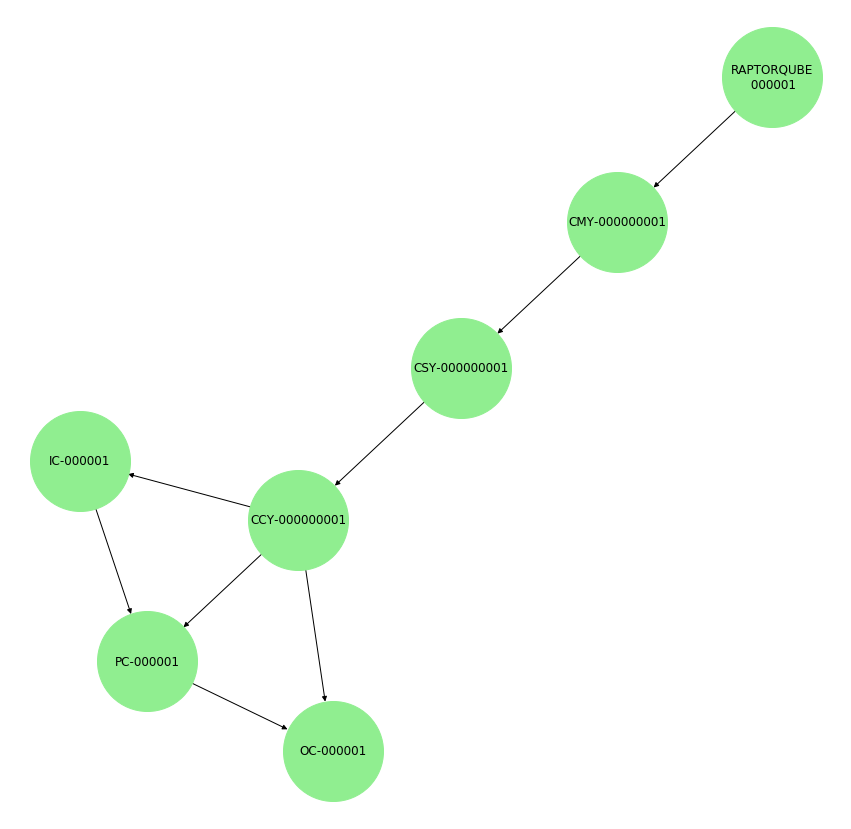


Crawler set: 2


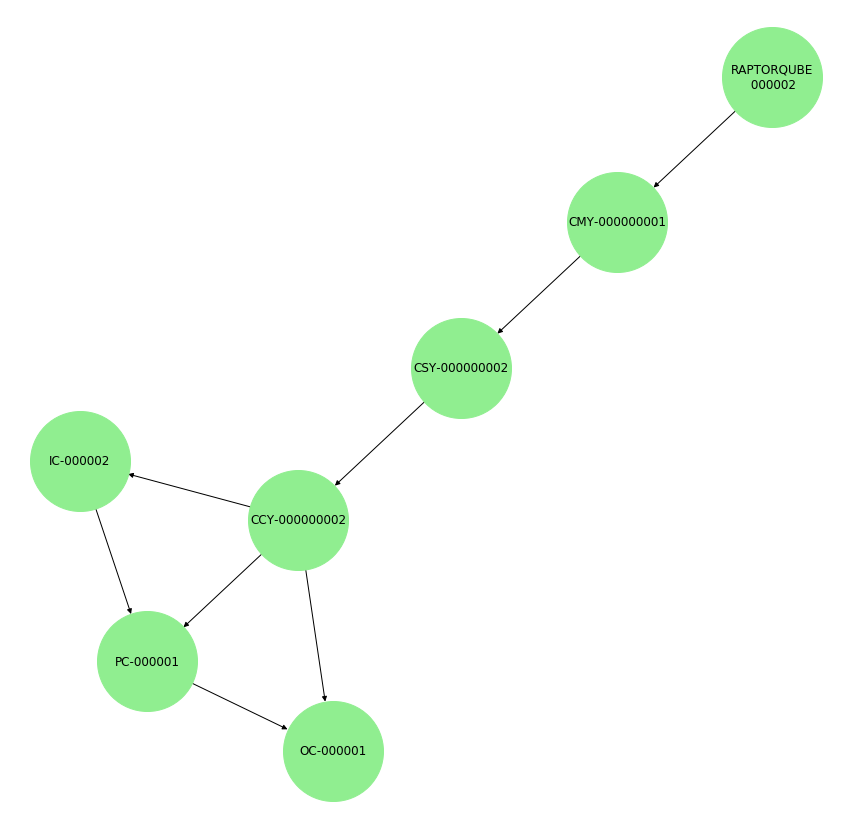


Crawler set: 3


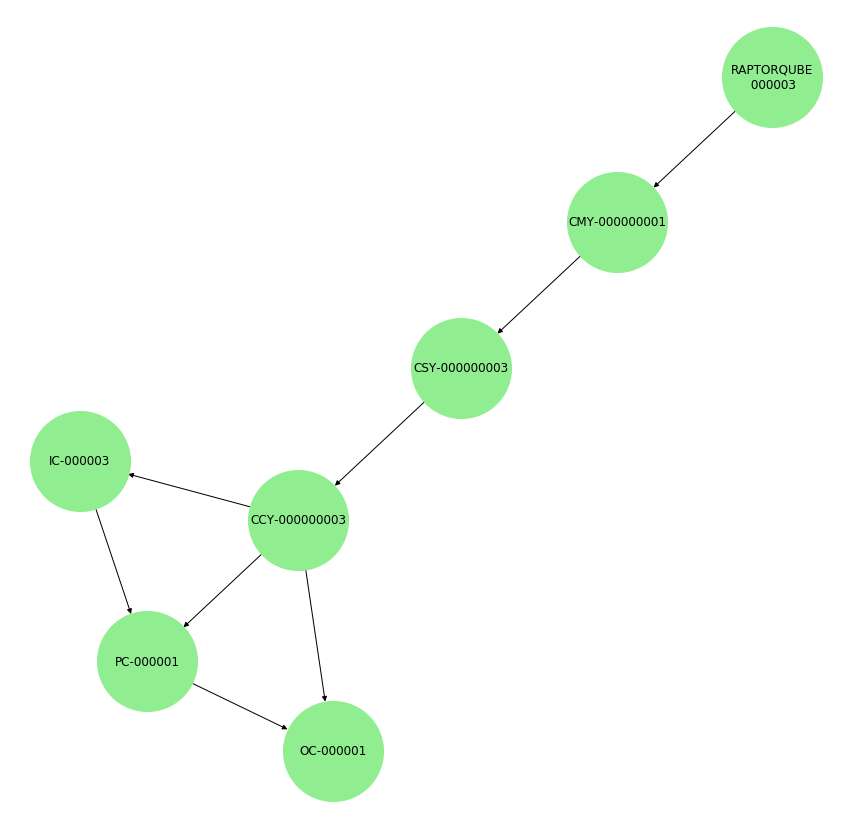


Crawler set: 4


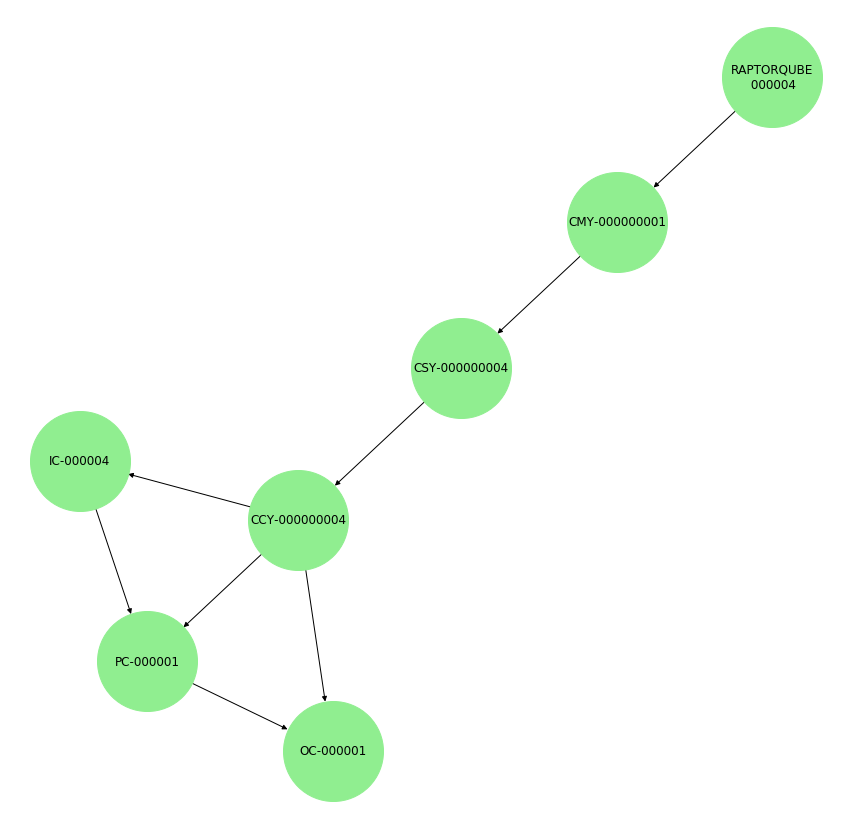


Crawler set: 5


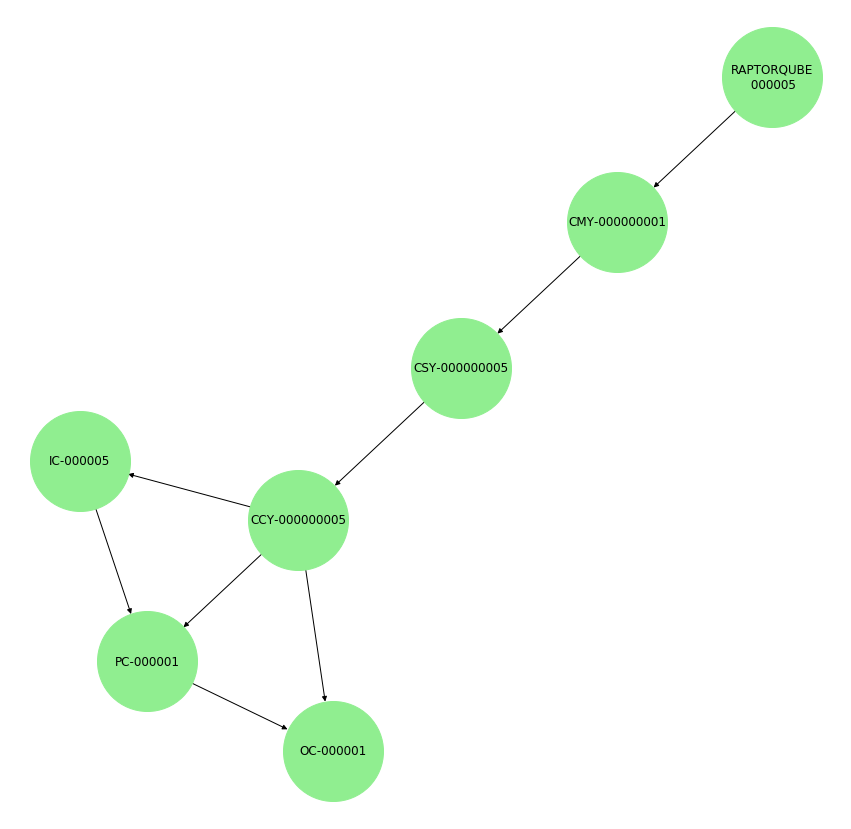


Crawler set: 6


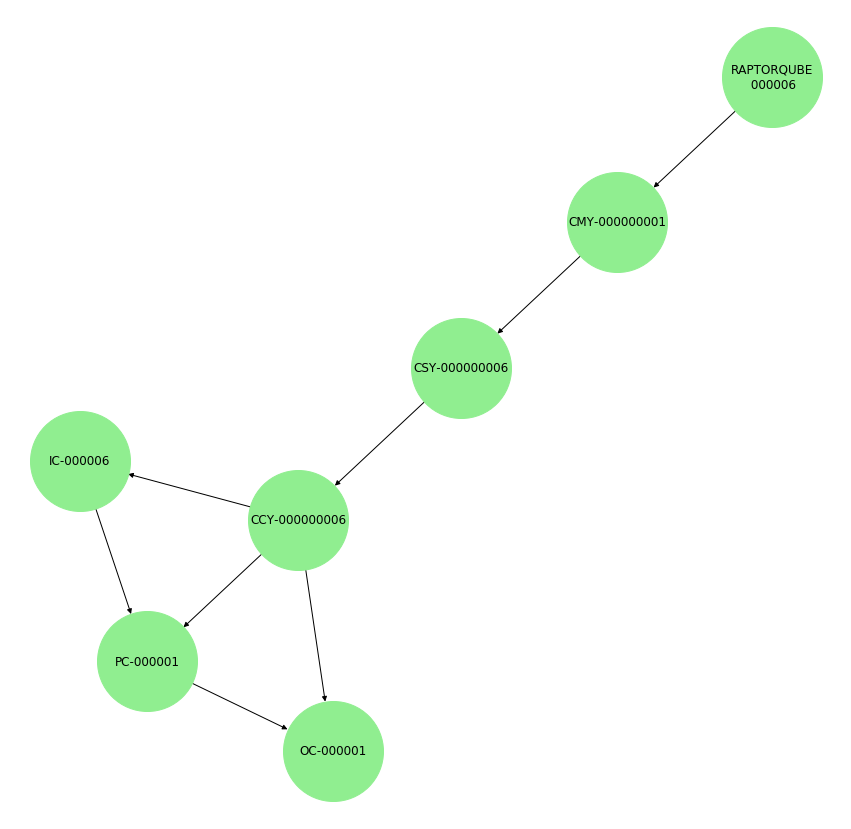


Crawler set: 7


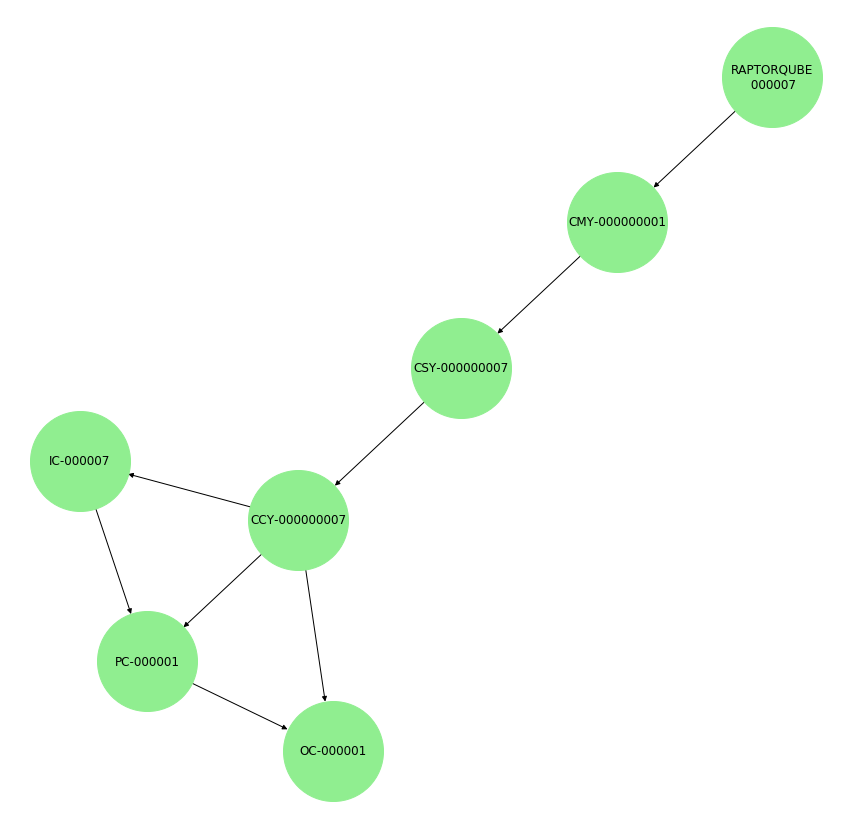


Crawler set: 8


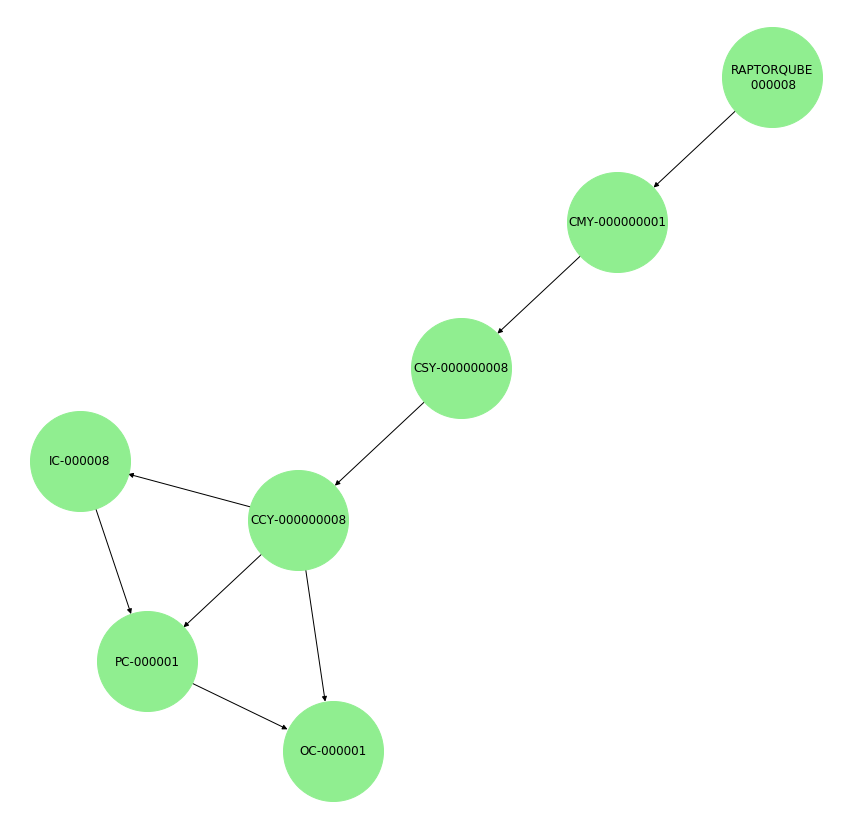


Crawler set: 9


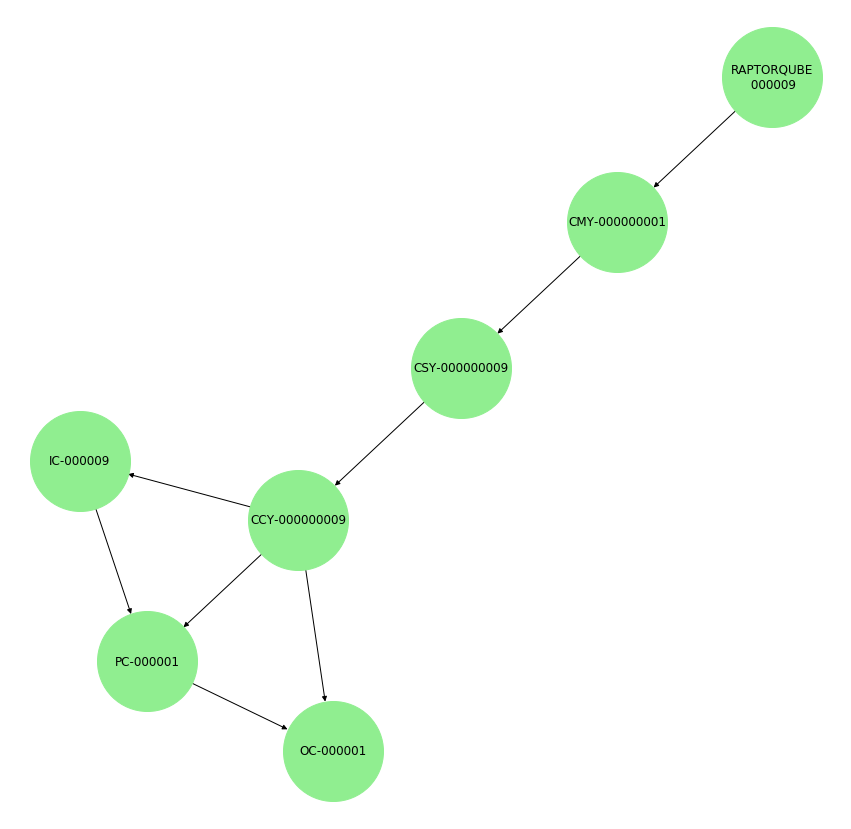


Crawler set: 10


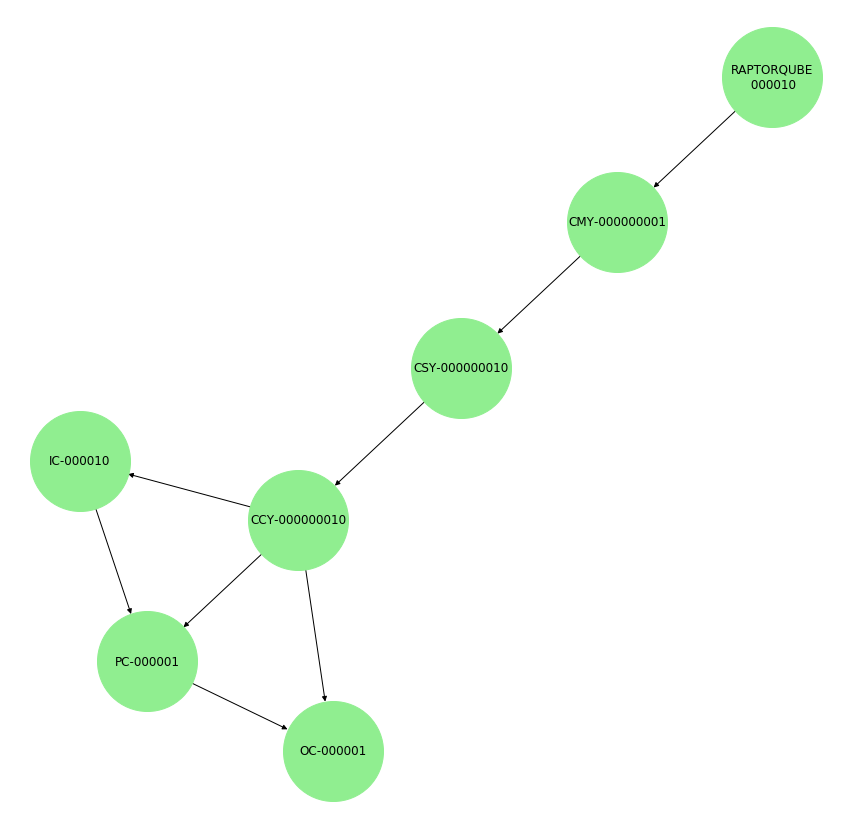


Crawler set: 11


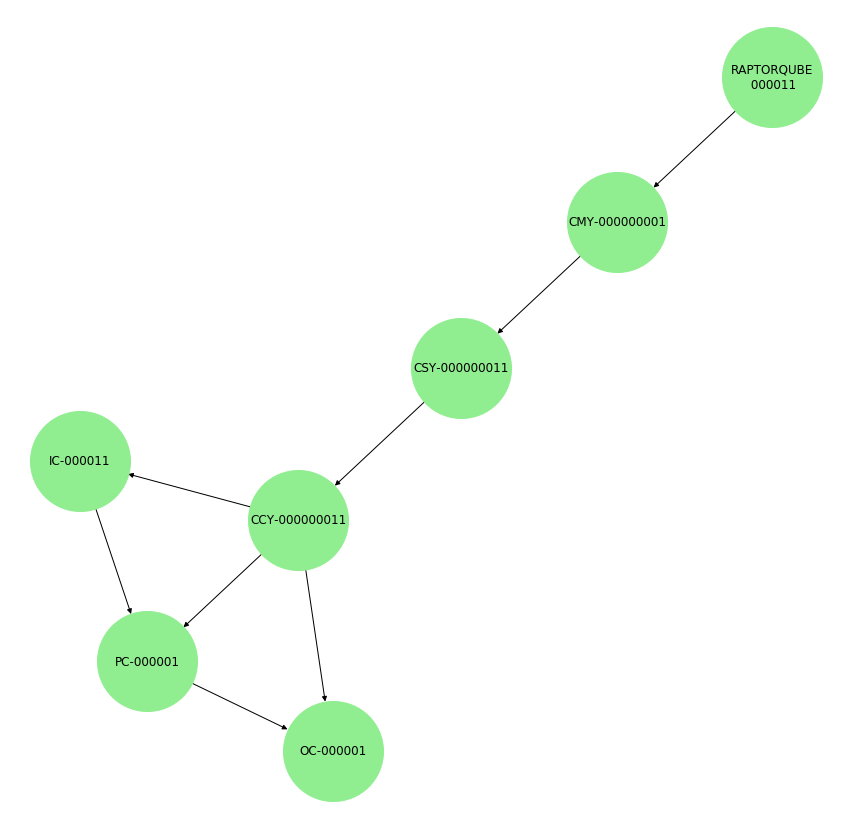


Crawler set: 12


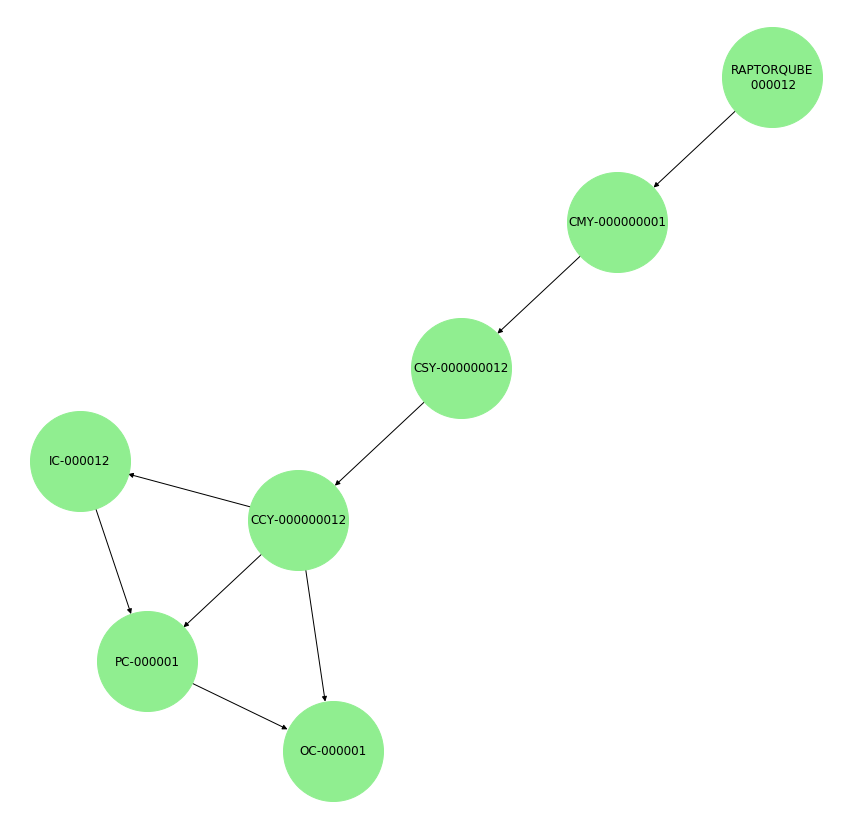


Crawler set: 13


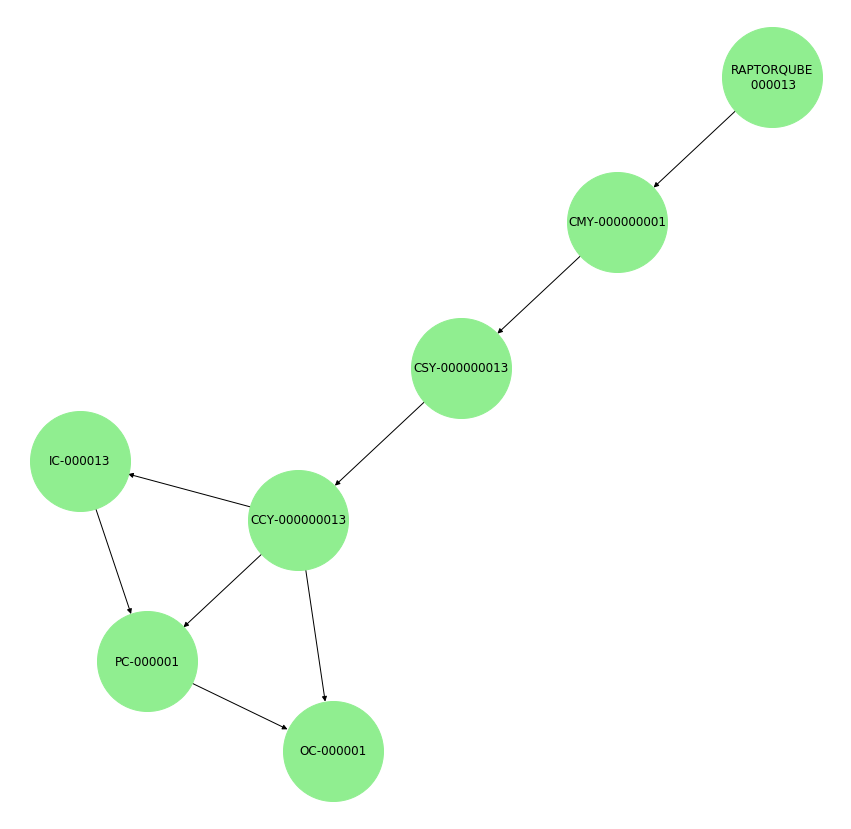


Crawler set: 14


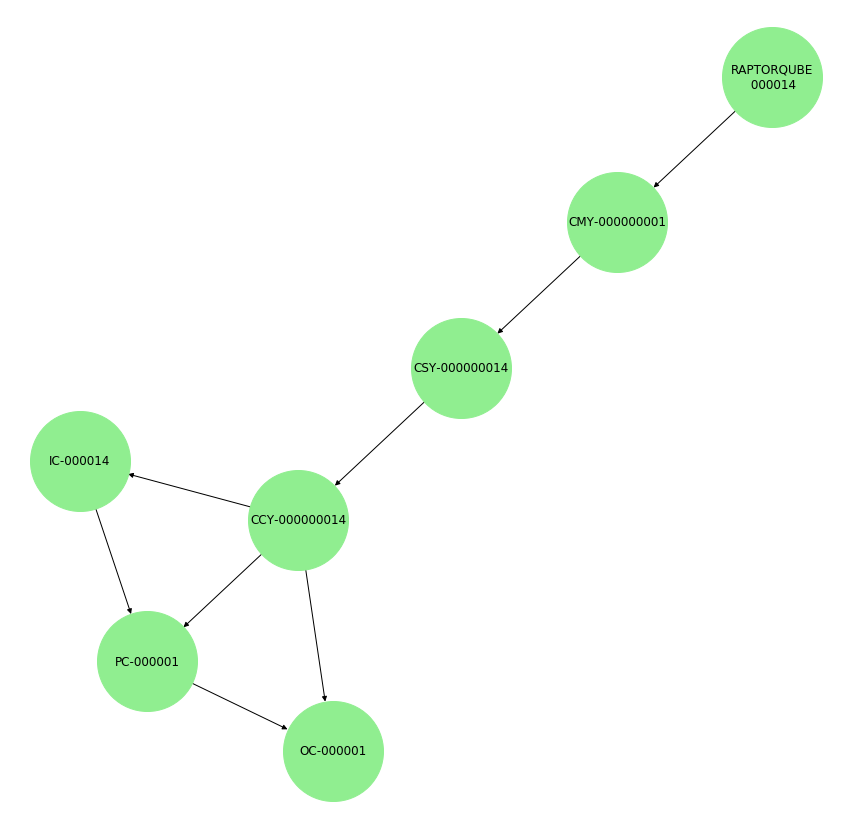


Crawler set: 15


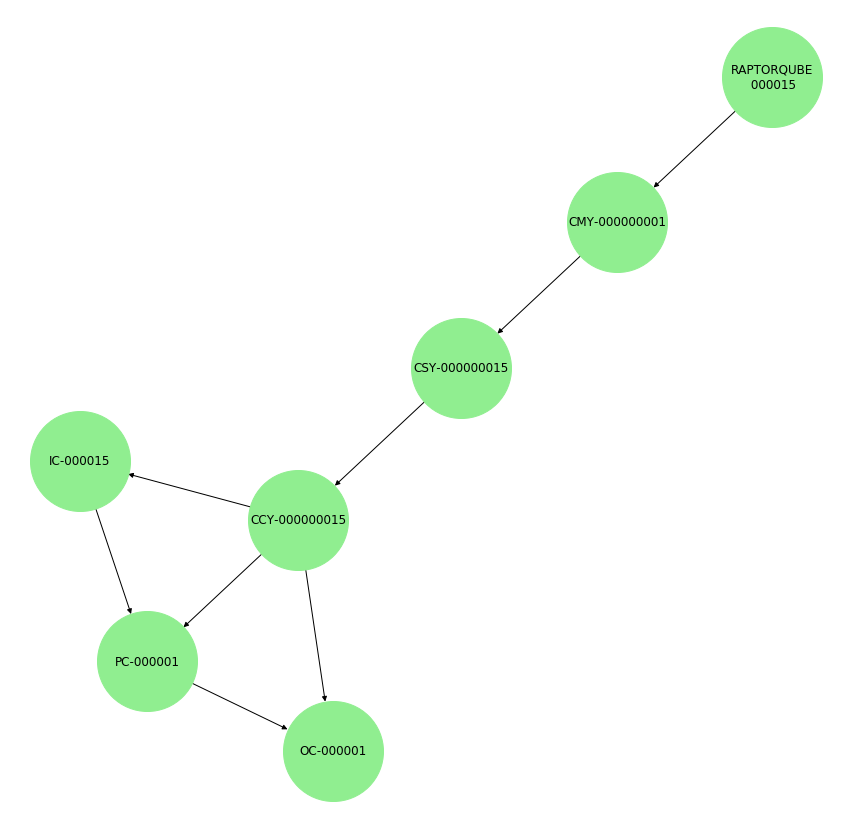


Crawler set: 16


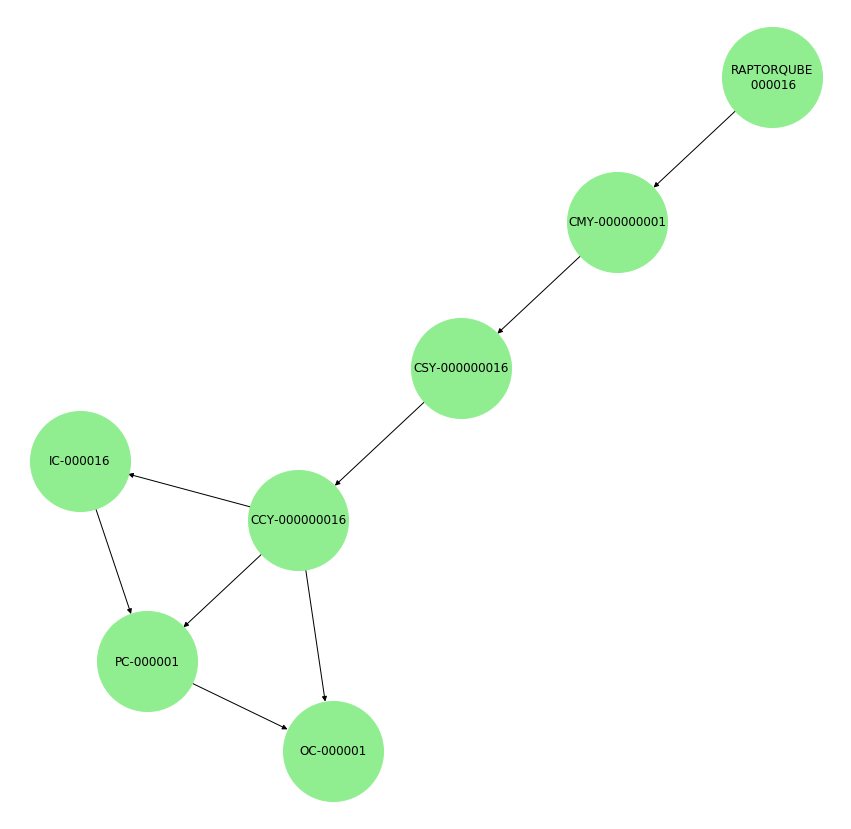


Crawler set: 17


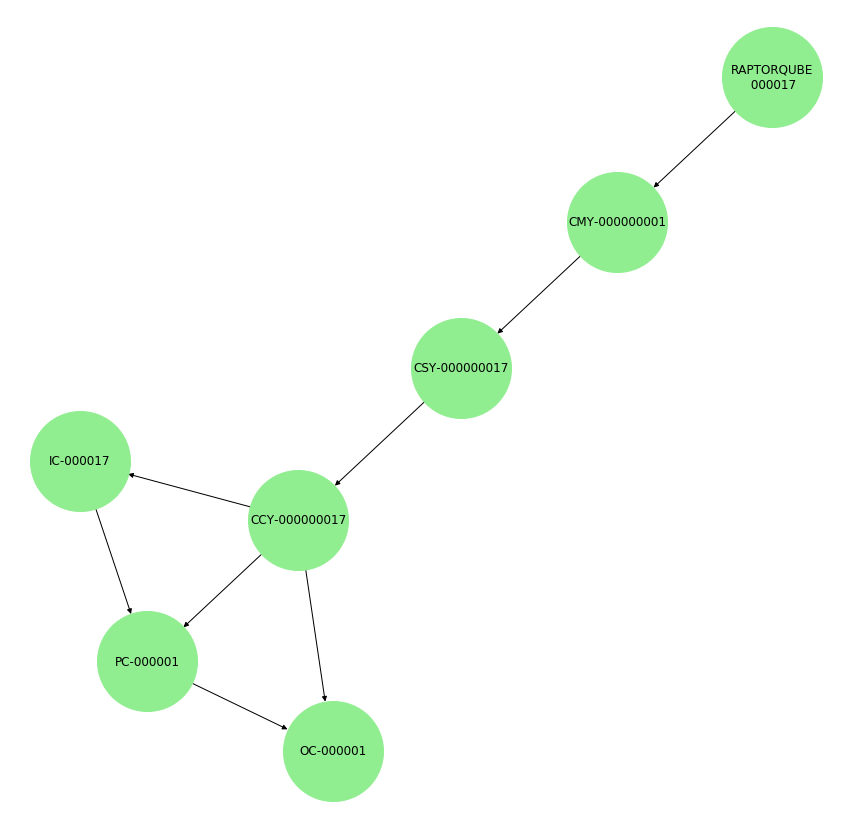


Crawler set: 18


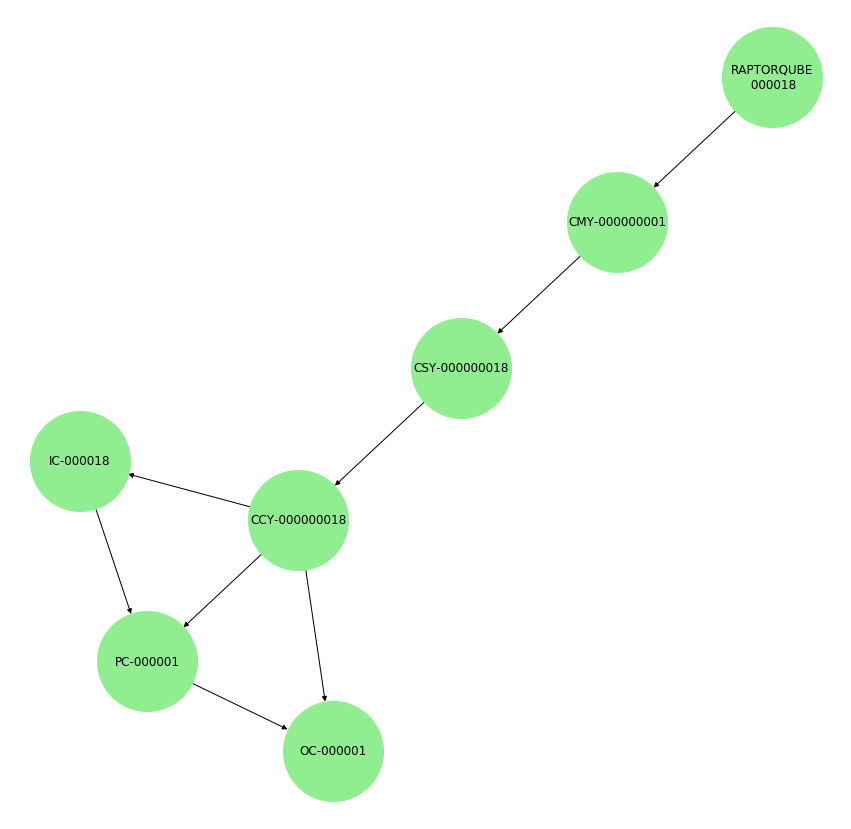


Crawler set: 19


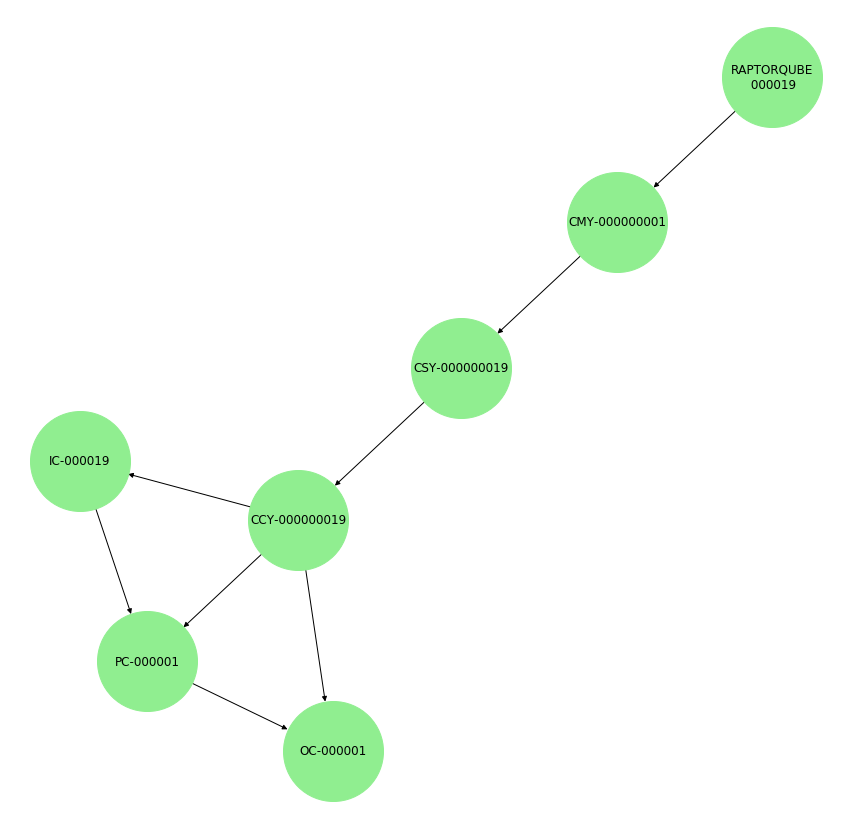


Crawler set: 20


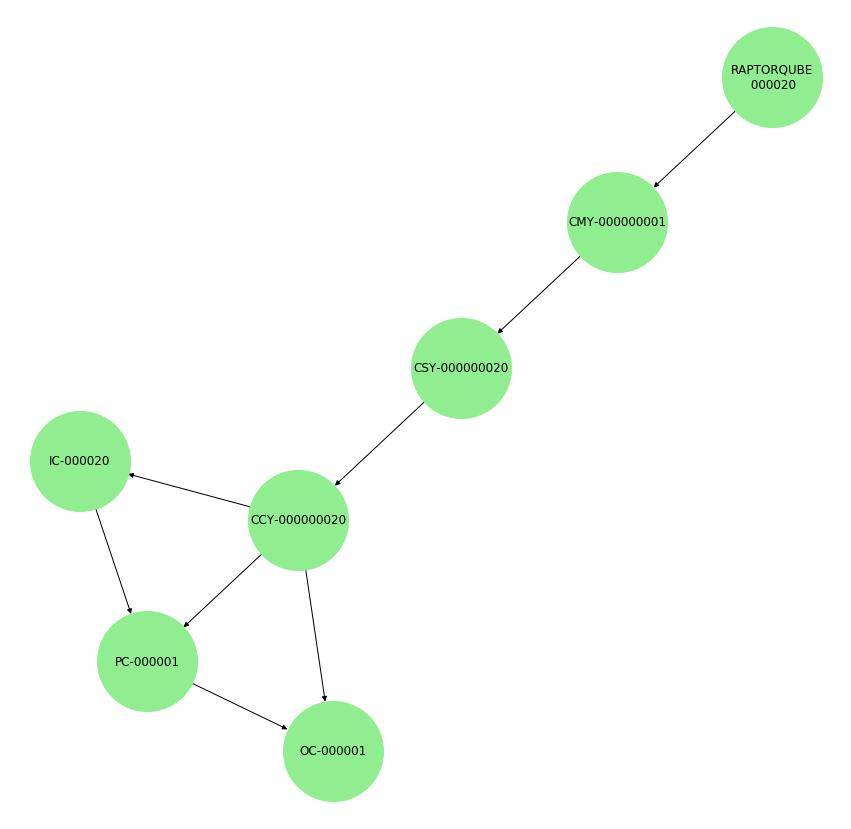


Crawler set: 21


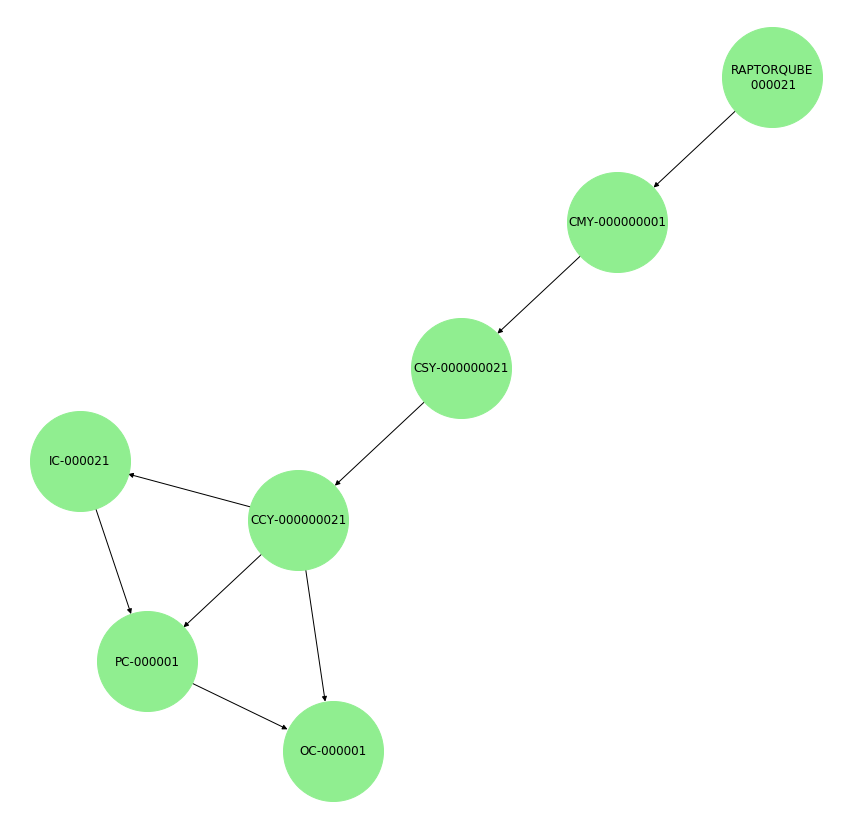


Crawler set: 22


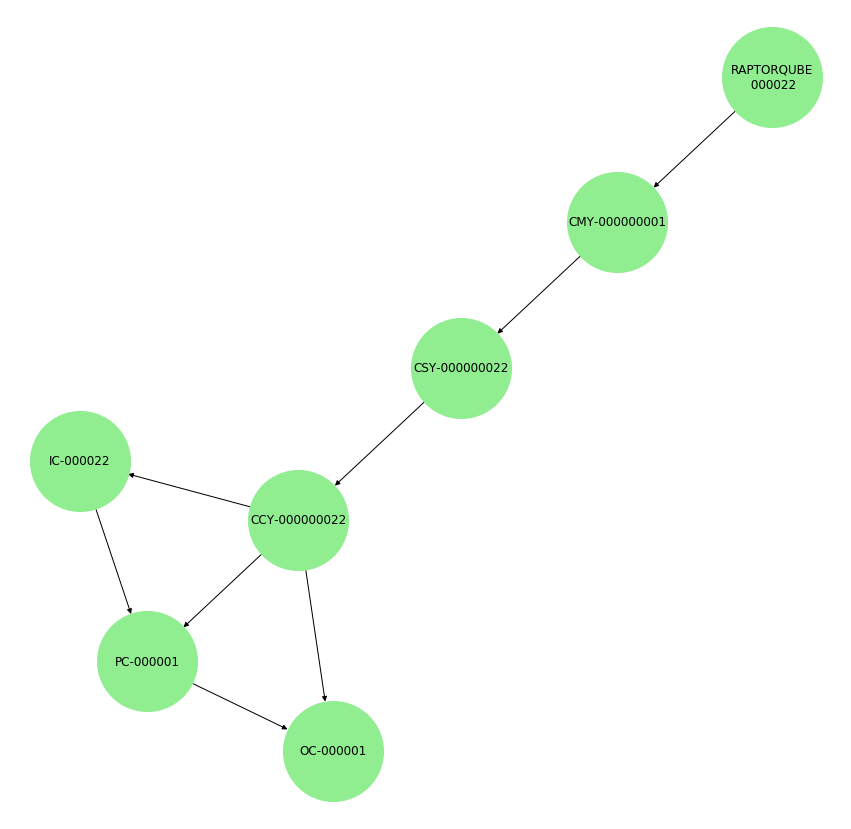


Crawler set: 23


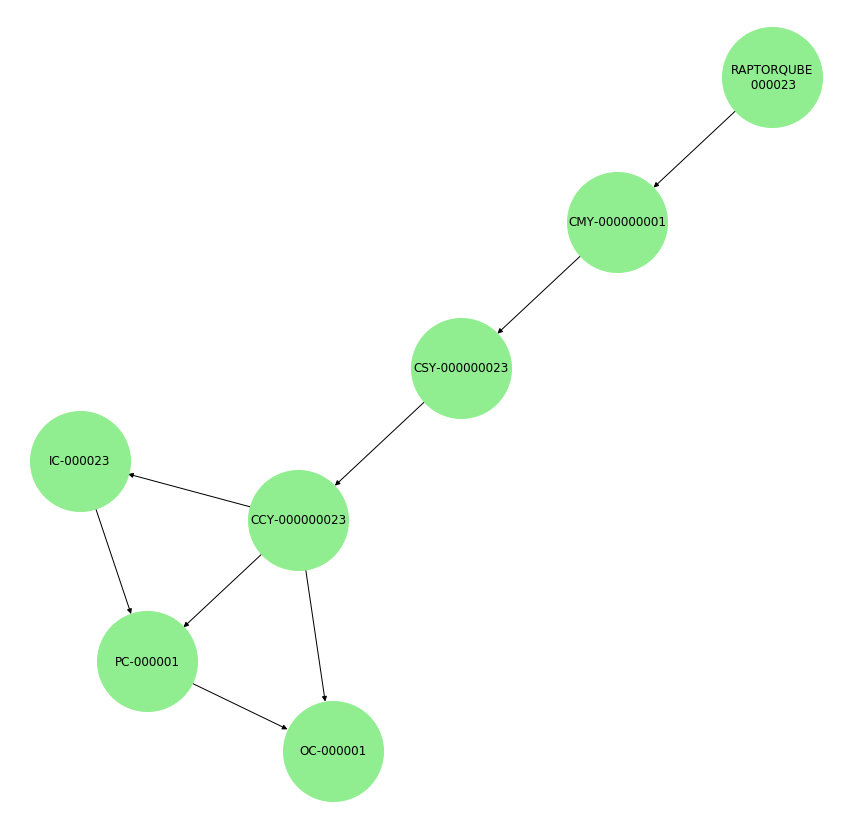


Crawler set: 24


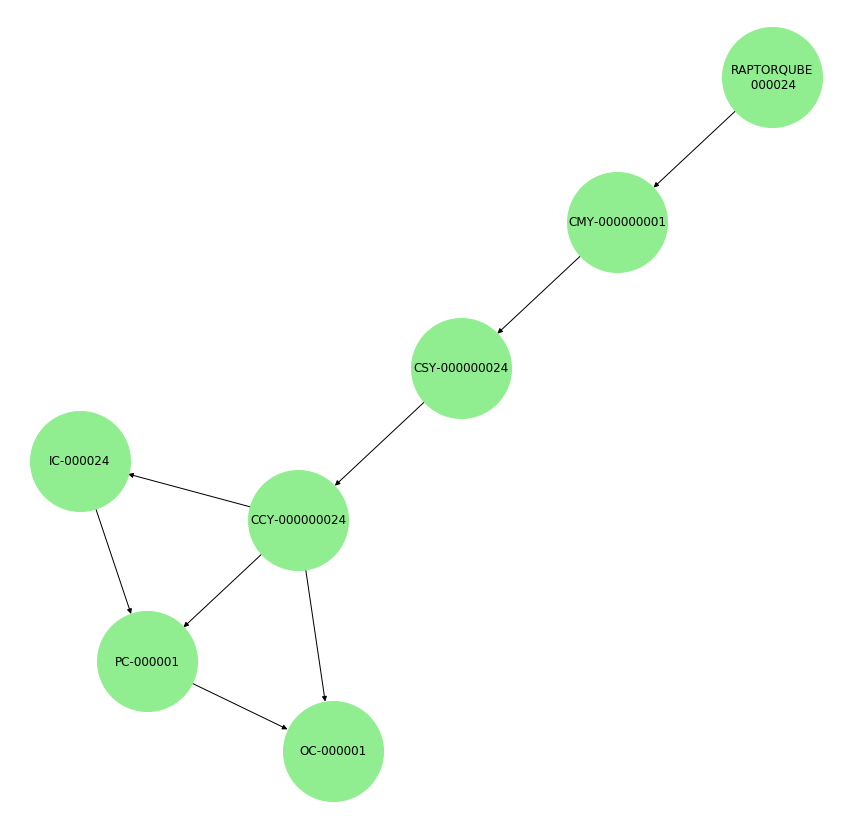


Crawler set: 25


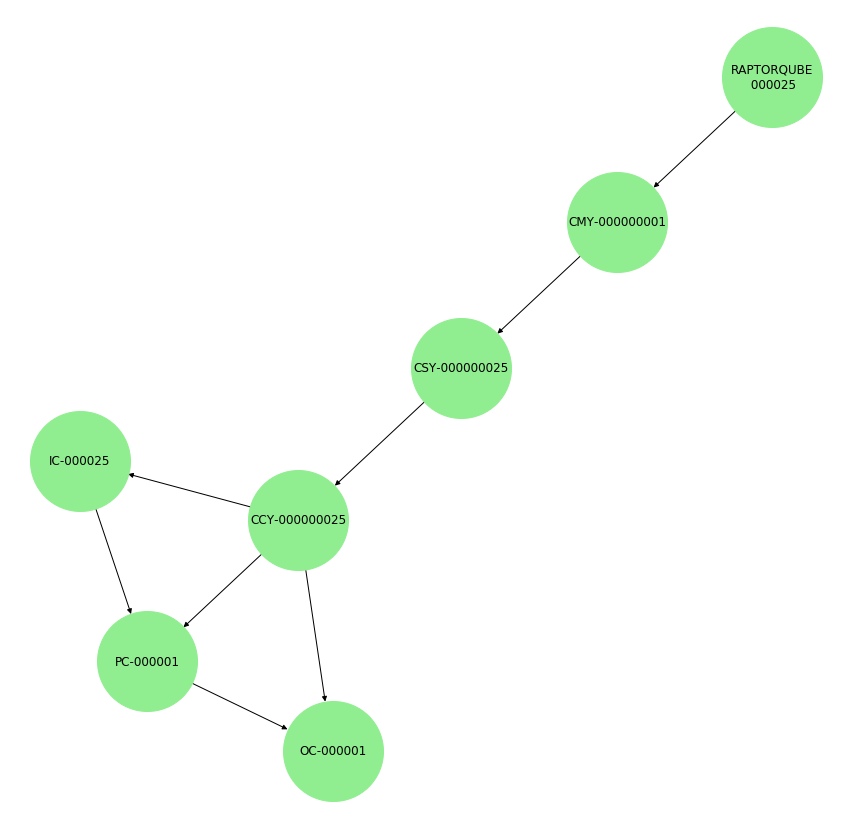


Crawler set: 26


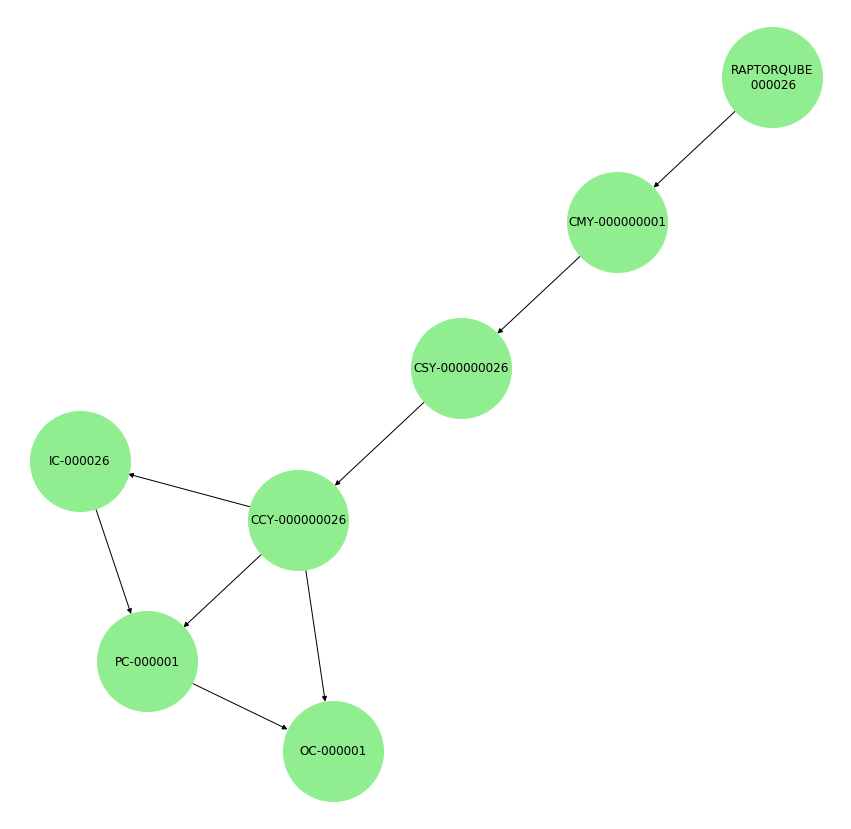


Crawler set: 27


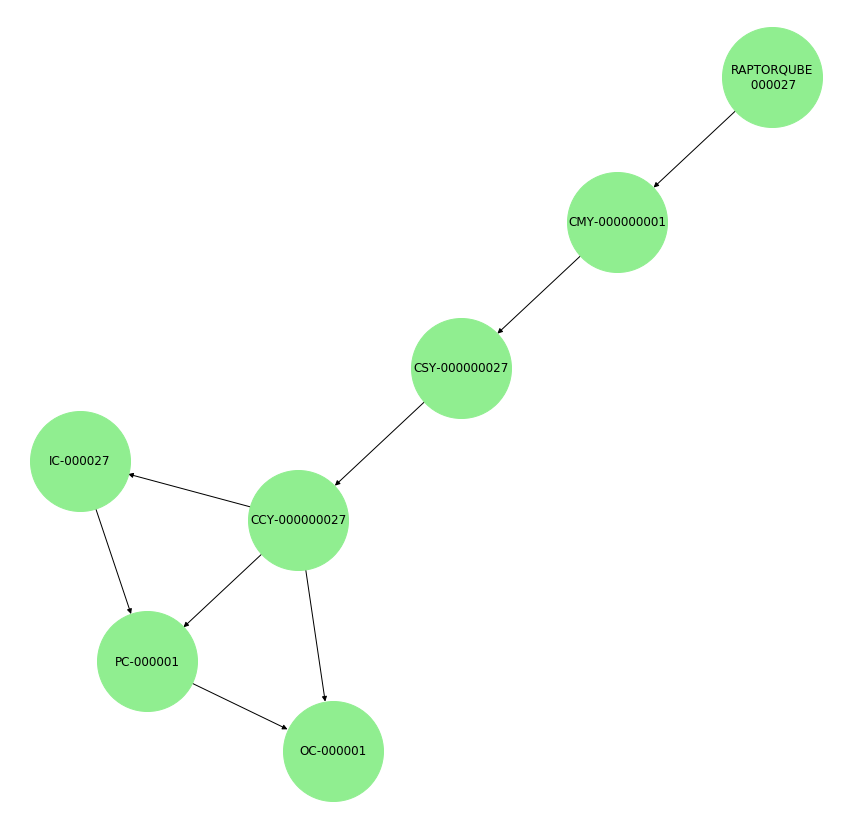


Crawler set: 28


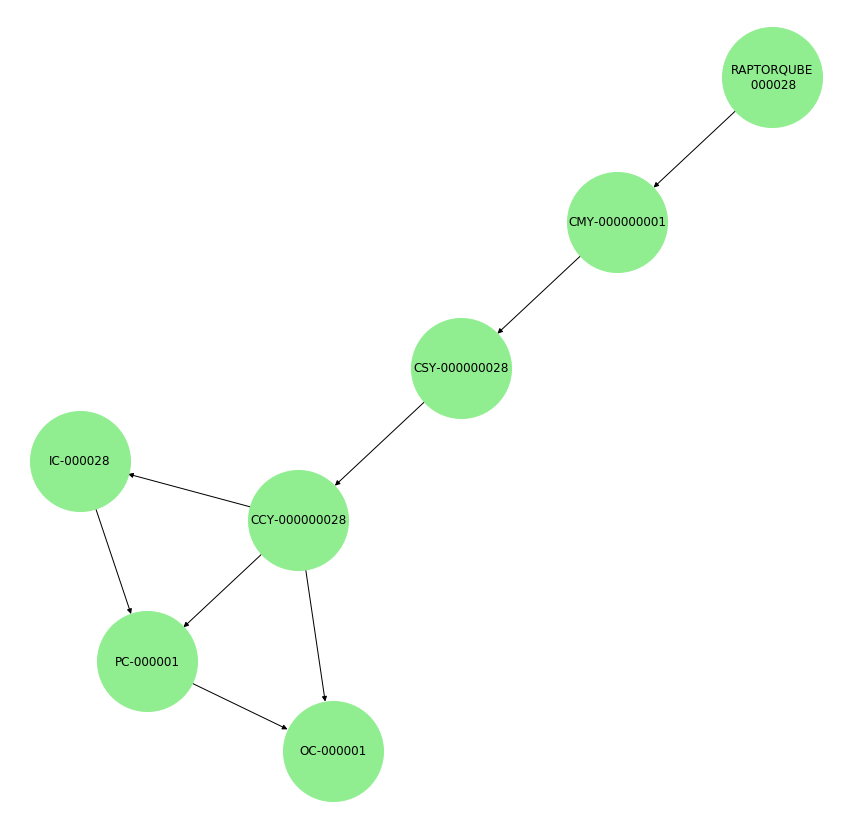

Done!


In [44]:
%run ./Crawler-Graph-Chromosome-0001.ipynb

In [45]:
print('Done!')

Done!
